# Parte 4 - SciPy

## ¿Qué es SciPy?

* Conjunto de paquetes para computación científica general
* Integración, optimización, interpolación, procesamiento de señales digitales, estadísticas...
* Normalmente interfaces a programas muy utilizados escritos en Fortran, o C++

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Integración numérica

Para integración numérica e integración de ecuaciones diferenciales, SciPy proporciona el paquete `integrate`.

In [3]:
from scipy import integrate

Por ejemplo, supongamos que queremos integrar esta función:

$$f(x) = e^{-x^2}$$

Debemos definir una función en Python cuyo argumento sea la variable de integración:

In [4]:
def f(x):
    return np.exp(-x ** 2)

Y ahora simplemente utilizamos la función `quad`, que recibe como argumentos la función y los límites de integración.

In [6]:
integrate.quad(f, 0, 5)

(0.8862269254513955, 2.3183115139669666e-14)

Se devuelve el resultado de la integración y una estimación del error cometido.

Puede darse el caso en que nuestra función dependa de un cierto número de parámetros:

$$f(x) = A e^{-B x^2}$$

En este caso, debemos seguir respetando que el primer argumento es la variable de integración, pero a partir de ahí podemos añadir todos los argumentos que queramos:

In [7]:
def f(x, A, B):
    return A * np.exp(-B * x ** 2)

A la hora de integrar esta función, tendremos que usar el parámetro `args` para dar valores  los argumentos extra de la función:

In [8]:
integrate.quad(f, 0, 5, args=(1.0, 1.0))

(0.8862269254513955, 2.3183115139669666e-14)

## Ecuaciones diferenciales ordinarias (EDOs)

Dentro del paquete `integrate` tenemos también funciones para resolver ecuaciones diferenciales ordinarias (EDOs), como es el caso de la función `odeint`. Esta función puede resolver cualquier sistema del tipo:

Por ejemplo, supongamos que queremos resolver la ecuación diferencial:

$$y' + y = 0$$

$$y' = f(y)$$

Hemos de definir la función del sistema, las condiciones iniciales y el vector de tiempos donde realizaremos la integración.

In [9]:
def f(y, t):
    return -y

In [10]:
y0 = 1.0

In [11]:
t = np.linspace(0, 3)

In [12]:
sol = integrate.odeint(f, y0, t)

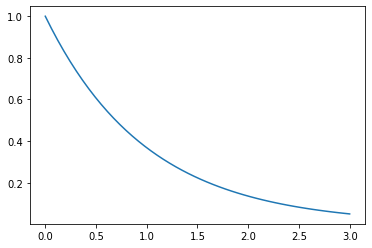

In [13]:
plt.plot(t, sol)

Y se obtiene la solución esperada: un decaimiento exponencial.

Para resolver ecuaciones de orden superior, habrá que realizar una reducción de orden:

$$y'' + y = 0$$

$$\mathbf{f}(\mathbf{y}) = \pmatrix{y \\ y'}' = \pmatrix{y' \\ y''} = \pmatrix{y' \\ -y}$$

In [14]:
def f(y, t):
    return np.array([y[1], -y[0]])

In [15]:
t = np.linspace(0, 10)

In [16]:
y0 = np.array([1.0, 0.0])

In [17]:
sol = integrate.odeint(f, y0, t)

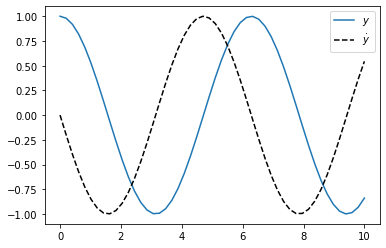

In [18]:
plt.plot(t, sol[:, 0], label='$y$')
plt.plot(t, sol[:, 1], '--k', label='$\dot{y}$')
plt.legend()

## Ecuaciones algebraicas no lineales

El paquete `optimize` contiene unas cuantas funciones para optimización con y sin restricciones, minimización de funciones, múltiples algoritmos... Ahora nos vamos a concentrar en la búsqueda de ceros de funciones, utilizando la función `root`.

In [19]:
from scipy import optimize

Por ejemplo, esta sería la función necesaria para resolver la ecuación de Kepler:

$$M = E - e \sin{E}$$

$$F(E) = E - e \sin{E} - M$$

In [20]:
def F(E, e, M):
    return E - e * np.sin(E) - M

La función `root` recibe como argumento la función de la ecuación, la condición inicial y posibles argumentos extra de la función.

In [21]:
sol = optimize.root(F, 0.1, args=(0.016, 0.1))
sol.x

array([0.10162317])

## Ajuste e interpolación

El paquete `optimize` trae también funciones para hacer ajustes. Para ver este tema explicado con detalle puedes leer el artículo [Ajuste e interpolación unidimensionales básicos con SciPy](http://pybonacci.wordpress.com/2013/08/15/ajuste-e-interpolacion-unidimensionales-basicos-en-python-con-scipy/) y el notebook incluido en los materiales del curso.